In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermart-grocery-sales-retail-analytics-dataset/Supermart Grocery Sales - Retail Analytics Dataset.csv


In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# **READING THE DATA**

In [3]:
df=pd.read_csv('/kaggle/input/supermart-grocery-sales-retail-analytics-dataset/Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [4]:
#display the first five rows of the data
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [5]:
#display the rows and columns
df.shape

(9994, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [7]:
# Dataframe has no NaN values. Lets look at its statistical view . using describe()
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [8]:
df.describe(include='object')

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,State
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,9994,50,7,23,24,1236,5,1
top,OD1,Amrish,Snacks,Health Drinks,Kanyakumari,09-05-2017,West,Tamil Nadu
freq,1,227,1514,719,459,38,3203,9994


In [9]:
#column names of table
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [10]:
# lets check data type of columns/attributes
df.dtypes

Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object

There are categorical and numerical data in this dataset. 

Now, we will take a look at the columns into two categories: Categorical and numerical data. For this section, we will have a general understanding of the most important columns. Next section we will explore correlation among columns.

Categorical columns:

Order ID          
Customer Name     
Category          
Sub Category      
City              
Order Date       
Region   
State

Numerical columns:

Sales
Profit
Discount

# **## Data Cleaning**

In [11]:
#Let's change the datatype of Order Date from object to date
df ['Order Date'] = pd.to_datetime (df ['Order Date'], errors='ignore')

In [12]:
#changed to date data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB


In [13]:
# Let"s count the number of missing (NaN) values in each column 
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

There is no missing values


In [14]:
#count the number of duplicate rows 
df.duplicated().sum()

0

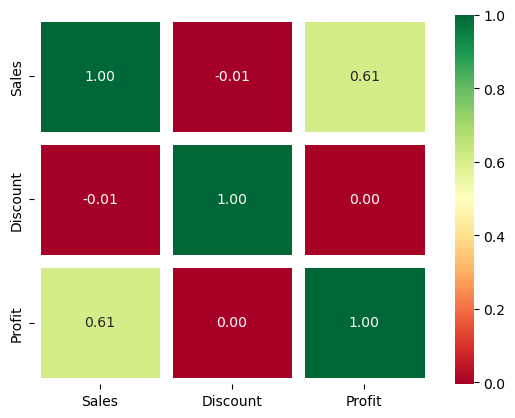

In [15]:
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn',fmt='.2f', lw = 8, linecolor = 'white');

Analysis:

1. **Sales and Profit Correlation (0.61)**:
   - A positive correlation of 0.61 between sales and profit suggests a moderately strong positive relationship between these two variables.
   - As sales increase, profit tends to increase as well, and as sales decrease, profit tends to decrease. The relationship is not perfect but is still considered positive.

2. **Discount and Profit Correlation (0.00)**:
   - There is no significant trend or pattern suggesting that changes in discount lead to predictable changes in profit. 
   - In practical terms, this correlation suggests that there is  no linear relationship between the amount of discount applied and the resulting profit. Changes in discount have minimal impact on profit.
   
 
3. **Discount and Sales Correlation (-0.01)**:
   - A very low negative correlation of -0.01 between discount and sales suggests a very weak negative relationship between these two variables.
   - In practical terms, this correlation indicates that there is almost no linear relationship between the amount of discount applied and the level of sales. Changing the discount has little impact on sales.

# **## Bivariate Analysis**

In [16]:
# applying groupby() function to
# group the data on Category.
da=df.groupby("Category")
da.first()

,Order ID,Customer Name,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
Category,,,,,,,,,,
Bakery,OD9,Hafiz,Biscuits,Tirunelveli,2015-06-09,West,791,0.23,181.93,Tamil Nadu
Beverages,OD2,Sudha,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu
"Eggs, Meat & Fish",OD12,Yadav,Eggs,Namakkal,2015-06-09,West,701,0.10,308.44,Tamil Nadu
Food Grains,OD3,Hussain,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu
Fruits & Veggies,OD4,Jackson,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu
Oil & Masala,OD1,Harish,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu
Snacks,OD11,Ganesh,Chocolates,Karur,2015-06-09,West,1903,0.13,437.69,Tamil Nadu


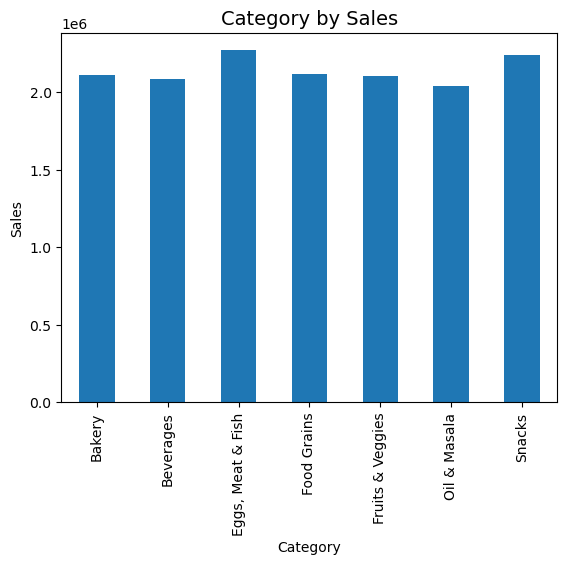

In [17]:
#we want to find the total sale by category
# firstly, we group by Category and get the total number of sales for each category
Sales_category=df.groupby("Category")["Sales"].sum()
#we create a plot of sales by category
Sales_category.plot(kind='bar')
plt.title('Category by Sales', fontsize = 14)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

The Egg, Meat &Fish Category contribute most to the sales, it had about 15% of the total sales, the company can invest more in it.

In [18]:
#Extract month from the order date
#Extract month from the order date
df['month_no'] = df['Order Date'].dt.month
df['Month'] = pd.to_datetime(df['Order Date']).dt.strftime('%B')
df['year'] = df['Order Date'].dt.year


In [19]:
#check the data to view the added columns
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,month_no,Month,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11,November,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11,November,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6,June,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10,October,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10,October,2016


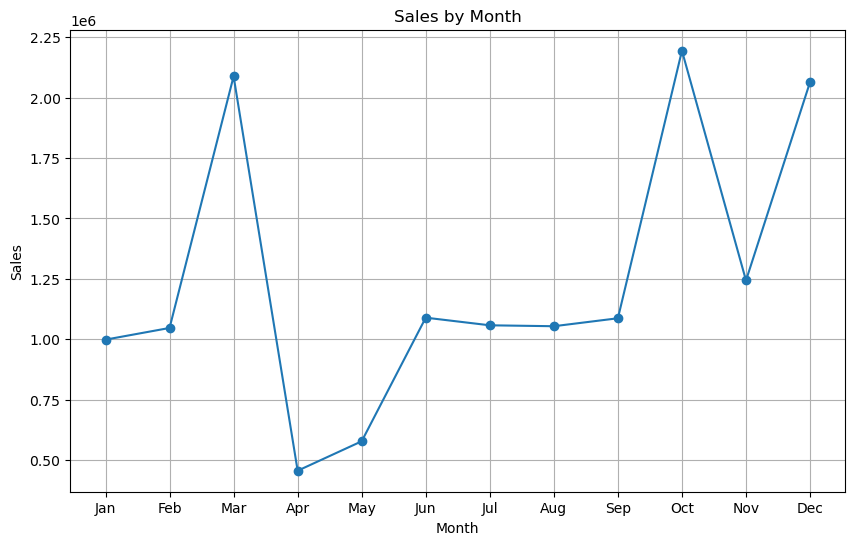

In [20]:
# Sum up sales by month
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

# Sort the data by month
monthly_sales_sorted = monthly_sales.sort_values(by='Month')

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_sorted['Month'], monthly_sales_sorted['Sales'], marker='o')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(monthly_sales_sorted['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


The Sales increase as the month increases which shows the company devised better and suitable plan to increase sales at each point in time.

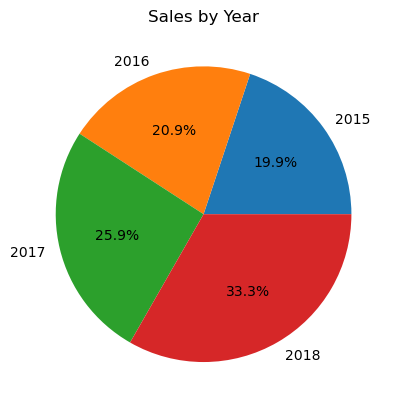

In [21]:
#we want to find the Yearly Sales
# we group by Year and get the total number of sales for each year
Yearly_Sales=df.groupby("year")["Sales"].sum()
# we create a pie chart with the sales by year
plt.pie(Yearly_Sales, labels=Yearly_Sales.index, autopct='%1.1f%%')
plt.title('Sales by Year')
plt.show()
#Monthly_Sales.plot(kind='pie')
#plt.title('Yearly Sales', fontsize = 14)
#plt.show()

The year 2017 and 2018 had more than 50 percent of the total sales which implies the sales increase as the year increases.

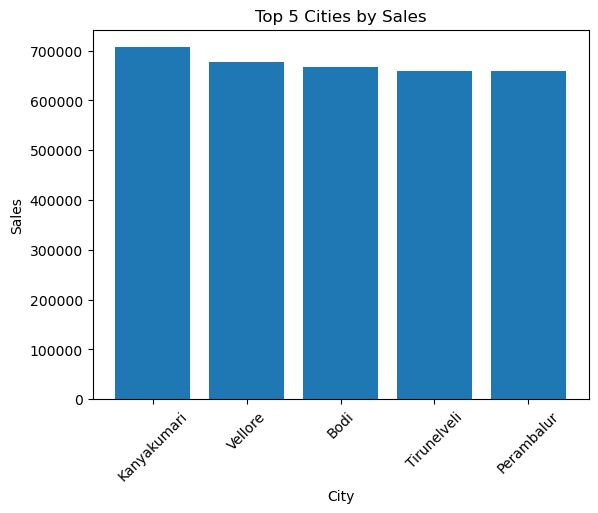

In [22]:


# Step 1: Extract relevant columns
city_sales = df[['City', 'Sales']]

# Step 2: Calculate total sales per city
total_sales = city_sales.groupby('City').sum()

# Step 3: Sort the cities by sales
sorted_cities = total_sales.sort_values(by='Sales', ascending=False)

# Step 4: Select the top 5 cities
top_cities = sorted_cities.head(5)

# Step 5: Plot the bar chart
plt.bar(top_cities.index, top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 5 Cities by Sales')
plt.xticks(rotation=45)
plt.show()


The top 5 City with the most Sales between 2015 to 2018 were Kanyakumari,Vellore, Bodi, Tirunelveli and Perambalur. Kanyakumari had $0.71 Sales,Velllore had $0.68 Sales and Bodi had $0.67 Sales or about 4.5% of all Sales, while Tirunelveli, and Perambalur had $0.66m sales respectively.